In [1]:
df.train = read.csv('titanic_train.csv')
head(df.train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [9]:
library(Amelia)

Loading required package: foreign
## 
## Amelia II: Multiple Imputation
## (Version 1.6.4, built: 2012-12-16)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


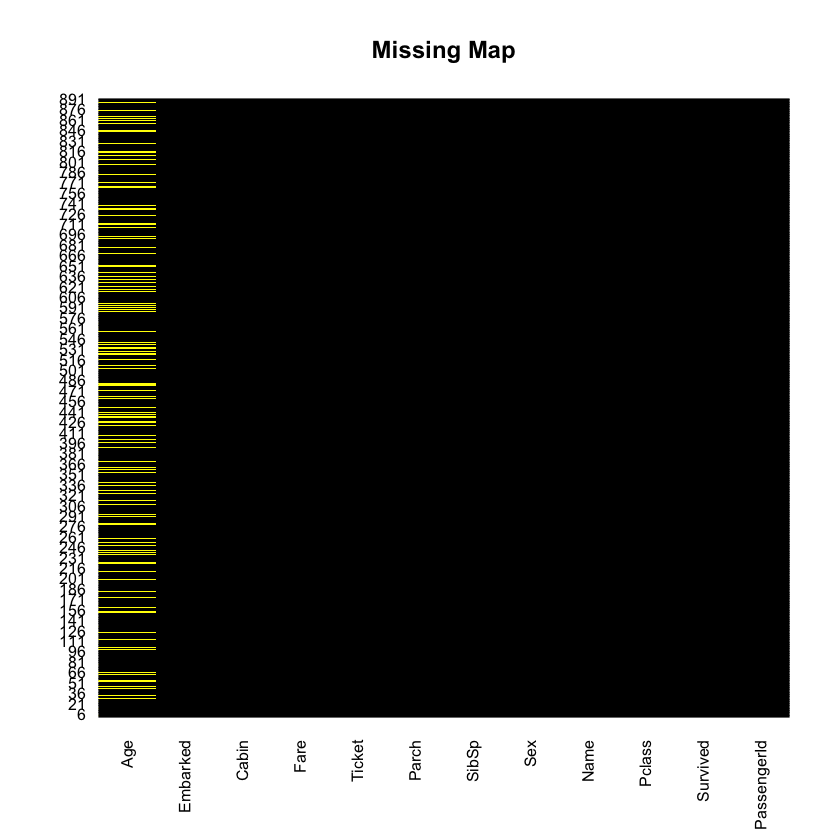

In [10]:
missmap(df.train, main = "Missing Map", col = c('yellow', 'black'), legend = FALSE)

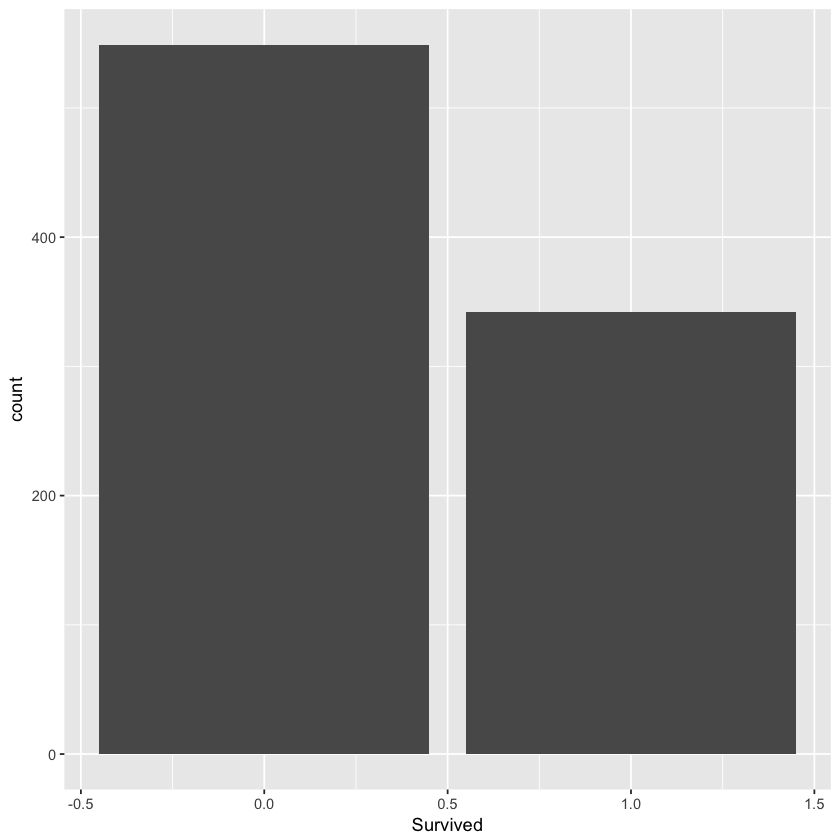

In [12]:
library(ggplot2)
ggplot(df.train, aes(Survived)) + geom_bar()

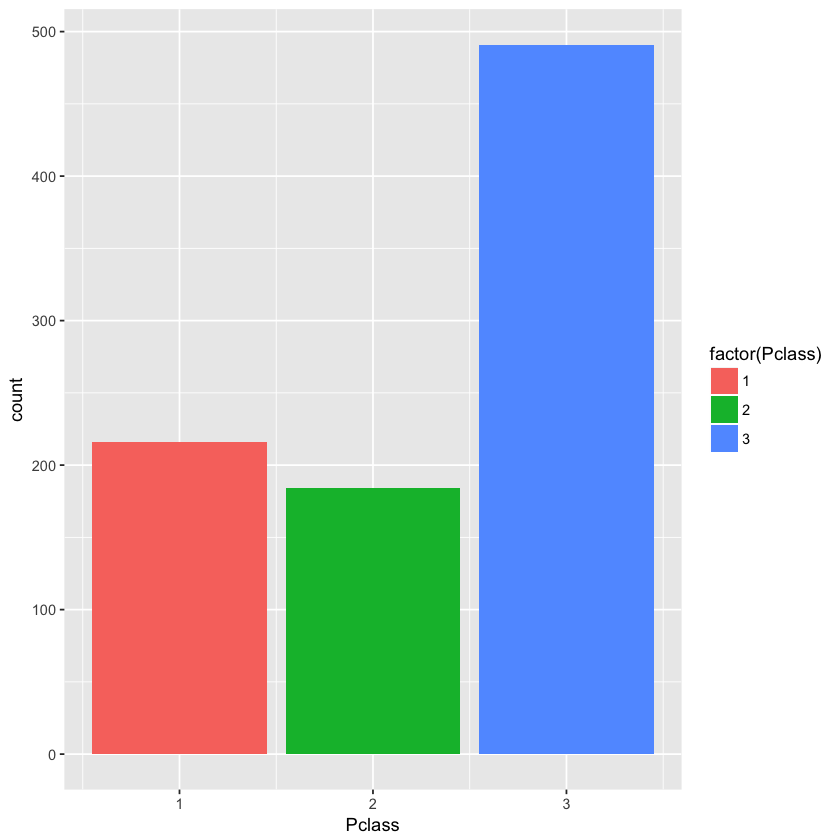

In [14]:
ggplot(df.train, aes(Pclass)) + geom_bar(aes(fill = factor(Pclass)))

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

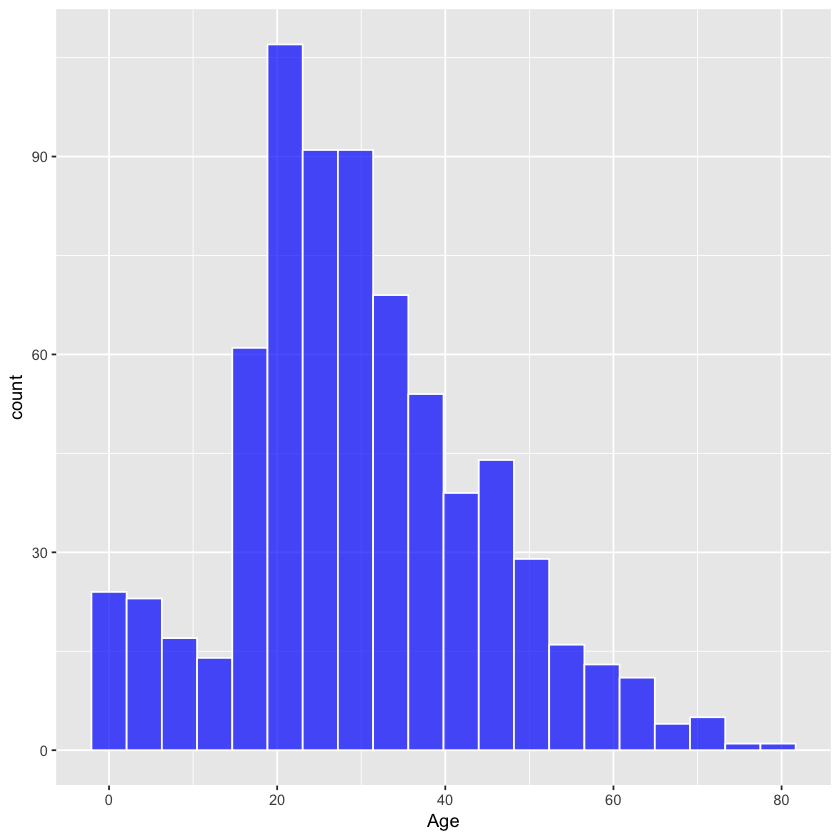

In [18]:
ggplot(df.train, aes(Age)) + geom_histogram(bins = 20, alpha = 0.7, fill = 'blue', color = 'white')

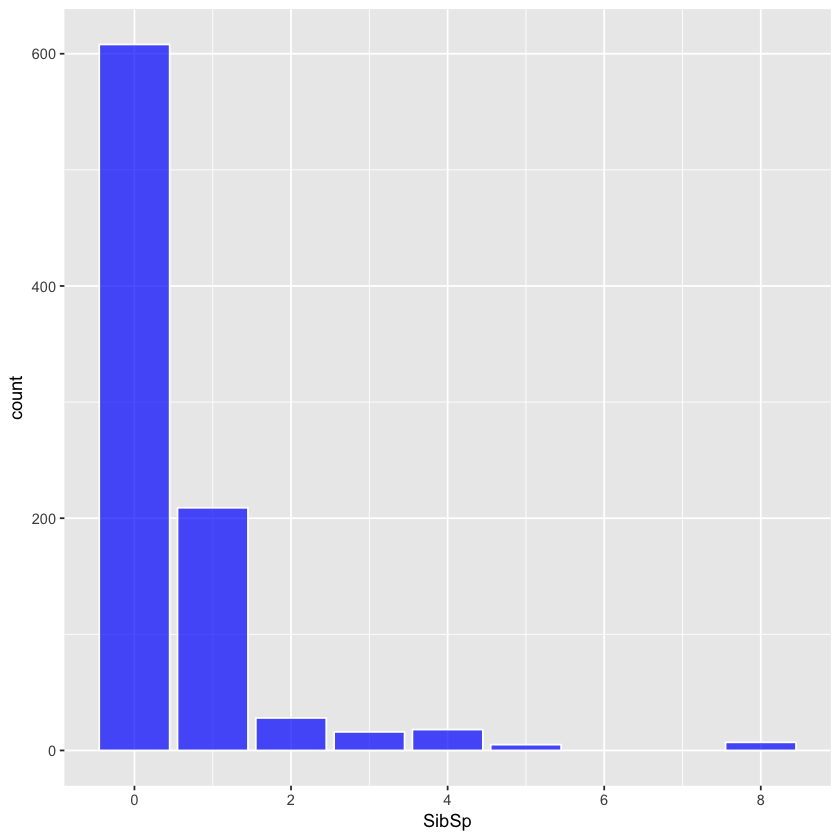

In [20]:
ggplot(df.train,aes(SibSp)) + geom_bar(alpha = 0.7, fill = 'blue', color = 'white')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


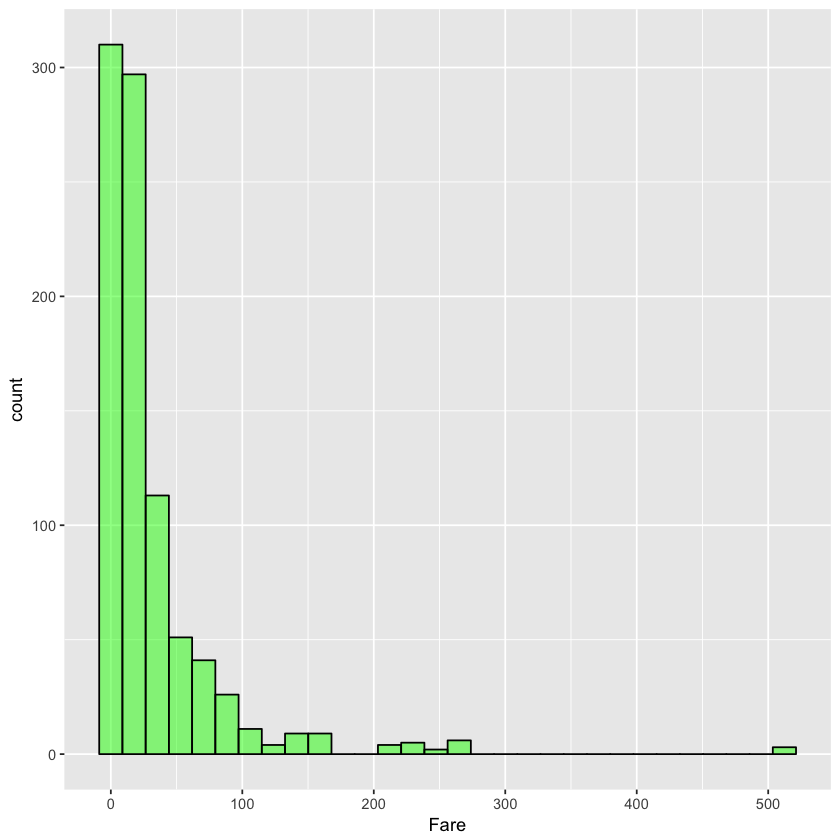

In [21]:
ggplot(df.train, aes(Fare)) + geom_histogram(fill = 'green', color = 'black', alpha = 0.5)

Warning message:
“Removed 177 rows containing non-finite values (stat_boxplot).”

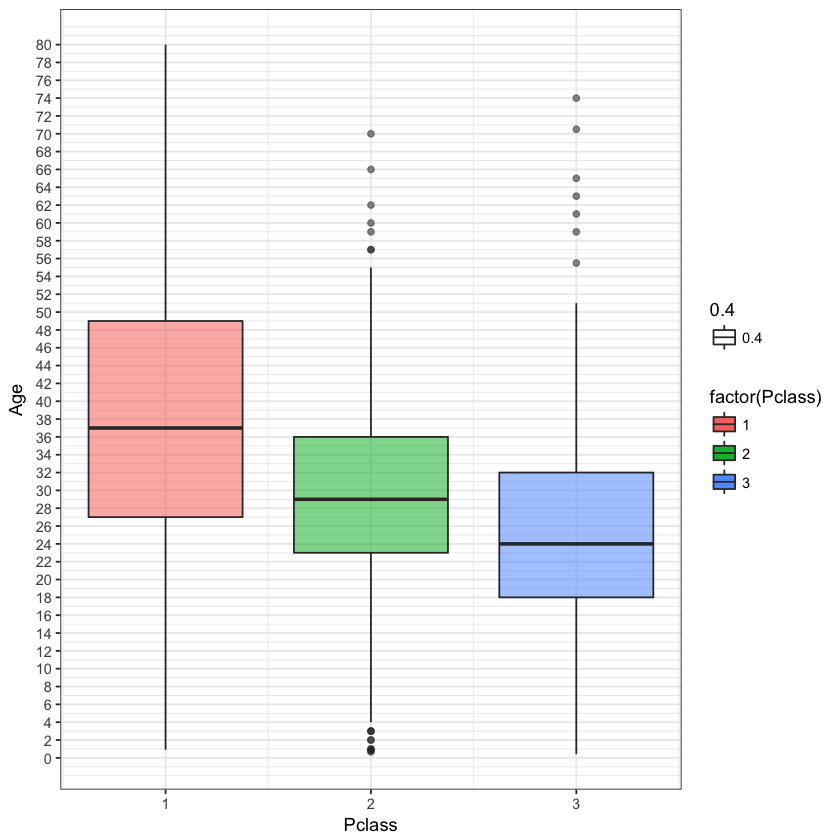

In [23]:
pl = ggplot(df.train, aes(Pclass, Age))
pl = pl + geom_boxplot(aes(group = Pclass, fill = factor(Pclass), alpha = 0.4))
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2)) + theme_bw()

In [54]:
impute_age <- function(age,class){
    out <- age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 37

            }else if (class[i] == 2){
                out[i] <- 29

            }else{
                out[i] <- 24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [55]:
fixed.ages = impute_age(df.train$Age, df.train$Pclass)
df.train$Age = fixed.ages

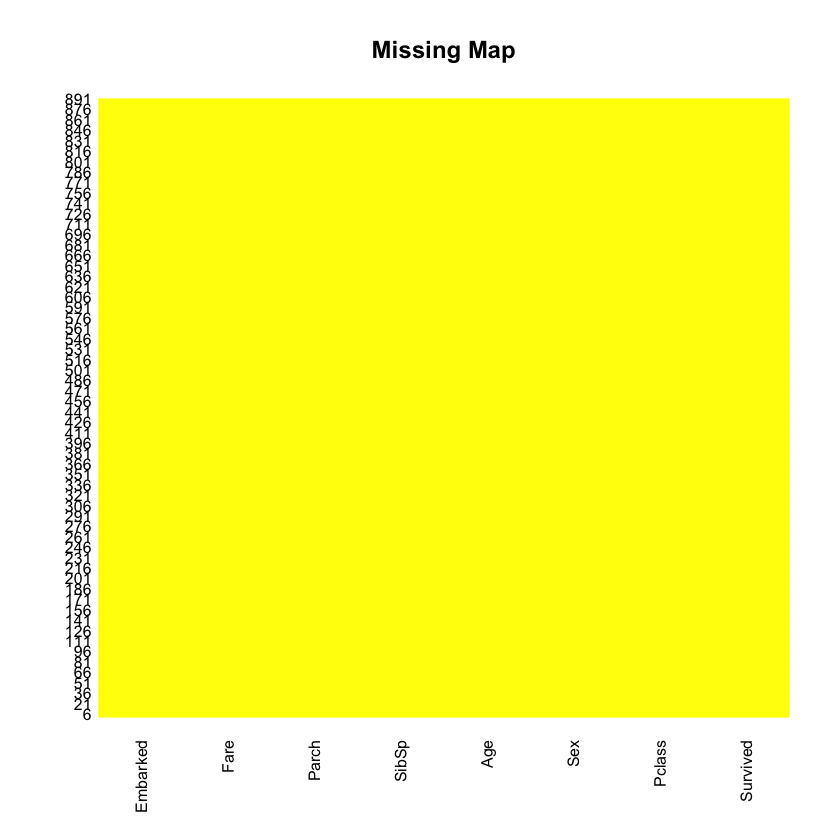

In [56]:
missmap(df.train, main = "Missing Map", col = c('yellow', 'black'), legend = FALSE)


In [57]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [30]:
head(df.train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,24,0,0,330877,8.4583,,Q


In [58]:
library(dplyr)

In [59]:
df.train = select(df.train, -PassengerId, -Name, -Ticket, -Cabin)

ERROR: Error in overscope_eval_next(overscope, expr): object 'PassengerId' not found


In [60]:
head(df.train)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,24,0,0,8.4583,Q


In [34]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [61]:
df.train$Survived = factor(df.train$Survived)
df.train$Pclass = factor(df.train$Pclass)
df.train$Parch = factor(df.train$Parch)
df.train$SibSp = factor(df.train$SibSp)

In [62]:
log.model = glm(formula = Survived ~., family = binomial(link='logit'), data = df.train)
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8158  -0.6134  -0.4138   0.5808   2.4896  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.845e+01  1.660e+03   0.011 0.991134    
Pclass2     -1.079e+00  3.092e-01  -3.490 0.000484 ***
Pclass3     -2.191e+00  3.161e-01  -6.930 4.20e-12 ***
Sexmale     -2.677e+00  2.040e-01 -13.123  < 2e-16 ***
Age         -3.971e-02  8.758e-03  -4.534 5.79e-06 ***
SibSp1       8.135e-02  2.245e-01   0.362 0.717133    
SibSp2      -2.897e-01  5.368e-01  -0.540 0.589361    
SibSp3      -2.241e+00  7.202e-01  -3.111 0.001862 ** 
SibSp4      -1.675e+00  7.620e-01  -2.198 0.027954 *  
SibSp5      -1.595e+01  9.588e+02  -0.017 0.986731    
SibSp8      -1.607e+01  7.578e+02  -0.021 0.983077    
Parch1       3.741e-01  2.895e-01   1.292 0.196213    
Parch2       3.862e-02  3.824e-01   0.101 0.919560    
Parch3   

In [47]:
library(caTools)
split = sample.split(df.train$Survived, SplitRatio = 0.75)
final.train = subset(df.train, split == TRUE)
final.test = subset(df.train, split == FALSE)


In [39]:
final.log.model = glm(formula = Survived ~., family = binomial(link = 'logit'), data = final.train)

In [63]:
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9678  -0.5966  -0.4173   0.5556   2.4501  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.803e+01  1.668e+03   0.011 0.991377    
Pclass2     -8.115e-01  3.723e-01  -2.180 0.029256 *  
Pclass3     -1.829e+00  3.761e-01  -4.863 1.15e-06 ***
Sexmale     -2.592e+00  2.328e-01 -11.134  < 2e-16 ***
Age         -3.464e-02  1.010e-02  -3.429 0.000606 ***
SibSp1       2.836e-01  2.616e-01   1.084 0.278438    
SibSp2       7.807e-02  6.453e-01   0.121 0.903706    
SibSp3      -1.881e+00  7.991e-01  -2.353 0.018613 *  
SibSp4      -2.273e+00  9.175e-01  -2.477 0.013247 *  
SibSp5      -1.635e+01  1.059e+03  -0.015 0.987683    
SibSp8      -1.626e+01  8.335e+02  -0.020 0.984439    
Parch1       3.538e-01  3.277e-01   1.080 0.280224    
Parch2       3.568e-01  4.733e-01   0.754 0.450949    
Parch3

In [65]:
fitted.probabilities = predict(final.log.model, newdata = final.test, type = 'response')

In [66]:
fitted.results = ifelse(fitted.probabilities > 0.5, 1,0)
misClasificError = mean(fitted.results != final.test$Survived)
print(paste('Accuracy', 1-misClasificError))

[1] "Accuracy 0.7847533632287"


In [67]:
table(final.test$Survived, fitted.probabilities > 0.5)

   
    FALSE TRUE
  0   116   21
  1    27   59